In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('cleanedData.csv')
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'hourly_sal', 'emp_provided_sal', 'min_sal', 'max_sal',
       'avg_sal', 'job_state', 'same_state', 'company_age', 'python', 'r_lang',
       'excel', 'anaconda', 'rapid', 'sql', 'tensorflow', 'tableau', 'spark',
       'aws', 'job_simplified', 'seniority', 'job_description_len',
       'num_of_competetors'],
      dtype='object')

In [39]:
df.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1, inplace = True)
df.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,rapid,sql,tensorflow,tableau,spark,aws,job_simplified,seniority,job_description_len,num_of_competetors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,0,0,1,0,0,Data Scientist,NaN,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,1,0,0,0,0,0,Data Scientist,NaN,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,0,1,0,0,1,0,Data Scientist,NaN,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,0,0,0,0,0,0,Data Scientist,NaN,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,0,1,0,0,0,0,Data Scientist,NaN,2728,3


In [40]:
features = ['Company Name','job_simplified', 'seniority', 'job_description_len', 'Rating', 'job_state', 'same_state', 'company_age','num_of_competetors', 'min_sal', 'max_sal','avg_sal', 'hourly_sal', 'emp_provided_sal','python', 'r_lang','excel', 'anaconda', 'rapid', 'sql', 'tensorflow', 'tableau', 'spark','aws']
df1=df[features]
df1.head()

,Company Name,job_simplified,seniority,job_description_len,Rating,job_state,same_state,company_age,num_of_competetors,min_sal,...,python,r_lang,excel,anaconda,rapid,sql,tensorflow,tableau,spark,aws
0,Tecolote Research,Data Scientist,NaN,2536,3.8,NM,0,47,0,53,...,1,0,1,0,0,0,0,1,0,0
1,University of Maryland Medical System,Data Scientist,NaN,4783,3.4,MD,0,36,0,63,...,1,0,0,0,1,0,0,0,0,0
2,KnowBe4,Data Scientist,NaN,3461,4.8,FL,1,10,0,80,...,1,1,1,0,0,1,0,0,1,0
3,PNNL,Data Scientist,NaN,3883,3.8,WA,1,55,3,56,...,1,0,0,0,0,0,0,0,0,0
4,Affinity Solutions,Data Scientist,NaN,2728,2.9,NY,1,22,3,86,...,1,0,1,0,0,1,0,0,0,0


In [41]:
df1.describe()

,job_description_len,Rating,same_state,company_age,num_of_competetors,min_sal,max_sal,avg_sal,hourly_sal,emp_provided_sal,python,r_lang,excel,anaconda,rapid,sql,tensorflow,tableau,spark,aws
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3869.545822,3.618868,0.557951,46.591644,1.053908,74.719677,128.149596,101.434636,0.032345,0.022911,0.528302,0.076819,0.522911,0.001348,0.002695,0.512129,0.095687,0.199461,0.225067,0.237197
std,1521.495868,0.801210,0.496965,53.778815,1.384239,30.980593,45.220324,37.546122,0.177034,0.149721,0.499535,0.266484,0.499812,0.036711,0.051882,0.500190,0.294360,0.399865,0.417908,0.425651
min,407.000000,-1.000000,0.000000,-1.000000,0.000000,15.000000,16.000000,15.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2801.000000,3.300000,0.000000,11.000000,0.000000,52.000000,96.000000,73.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3731.000000,3.700000,1.000000,24.000000,0.000000,69.500000,124.000000,97.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4740.000000,4.000000,1.000000,59.000000,3.000000,91.000000,155.000000,122.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,10051.000000,5.000000,1.000000,276.000000,4.000000,202.000000,306.000000,254.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
df1.dtypes

Company Name            object
job_simplified          object
seniority               object
job_description_len      int64
Rating                 float64
job_state               object
same_state               int64
company_age              int64
num_of_competetors       int64
min_sal                  int64
max_sal                  int64
avg_sal                float64
hourly_sal               int64
emp_provided_sal         int64
python                   int64
r_lang                   int64
excel                    int64
anaconda                 int64
rapid                    int64
sql                      int64
tensorflow               int64
tableau                  int64
spark                    int64
aws                      int64
dtype: object

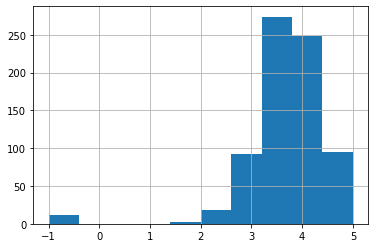

In [43]:
df.Rating.hist()

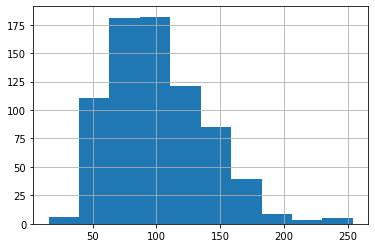

In [44]:
df.avg_sal.hist()

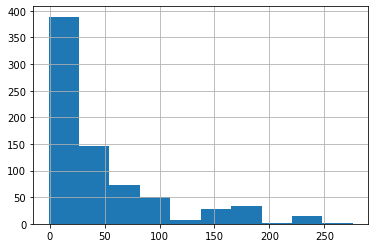

In [45]:
df1.company_age.hist()

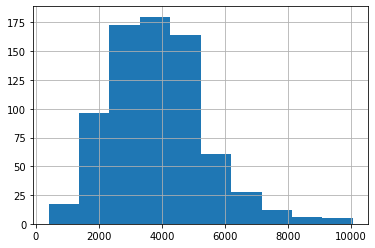

In [46]:
df1.job_description_len.hist()

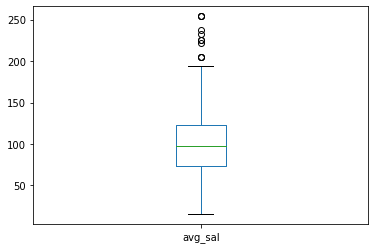

In [47]:
df1.avg_sal.plot(kind ='box')

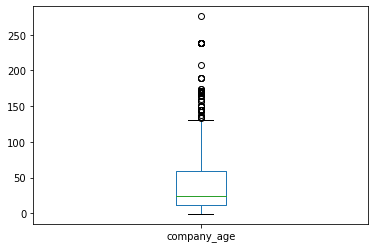

In [48]:
df1.company_age.plot(kind ='box')

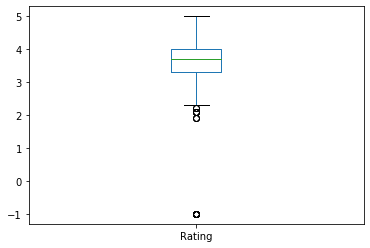

In [49]:
df1.Rating.plot(kind ='box')

In [50]:
df1[['company_age','avg_sal','Rating','job_description_len']].corr()

,company_age,avg_sal,Rating,job_description_len
company_age,1.000000,0.021996,0.021655,0.163911
avg_sal,0.021996,1.000000,0.012517,0.070474
Rating,0.021655,0.012517,1.000000,-0.012281
job_description_len,0.163911,0.070474,-0.012281,1.000000


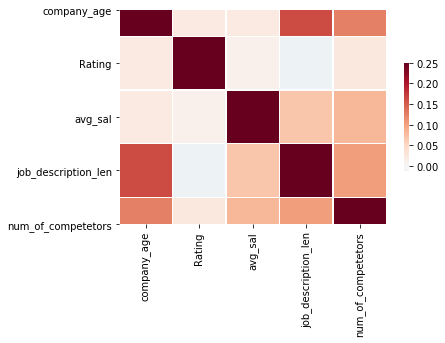

In [51]:
sns.heatmap(df1[['company_age','Rating','avg_sal','job_description_len','num_of_competetors']].corr(), vmax=.25, center=0,
            square=True, cmap = 'RdBu_r',linewidths=.5, cbar_kws={"shrink": .5})

In [52]:
# num_of_competetors-company_age, job_description_len-company_age, num_of_competetors-job_description_len, avg_sal-num_of_competetors
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly_sal', 'emp_provided_sal', 'min_sal', 'max_sal', 'avg_sal',
       'job_state', 'same_state', 'company_age', 'python', 'r_lang', 'excel',
       'anaconda', 'rapid', 'sql', 'tensorflow', 'tableau', 'spark', 'aws',
       'job_simplified', 'seniority', 'job_description_len',
       'num_of_competetors'],
      dtype='object')

In [53]:
df_categorical = df[['Company Name','Headquarters', 'Size', 'Founded','Type of ownership',
                     'Industry', 'Sector', 'Revenue','job_state', 'same_state',
                     'python', 'r_lang', 'excel','anaconda', 'rapid', 'sql',
                     'tensorflow', 'tableau', 'spark', 'aws','job_simplified',
                     'seniority', 'job_description_len']]
df_categorical.head()

,Company Name,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,job_state,same_state,...,anaconda,rapid,sql,tensorflow,tableau,spark,aws,job_simplified,seniority,job_description_len
0,Tecolote Research,"Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),NM,0,...,0,0,0,0,1,0,0,Data Scientist,NaN,2536
1,University of Maryland Medical System,"Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),MD,0,...,0,1,0,0,0,0,0,Data Scientist,NaN,4783
2,KnowBe4,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),FL,1,...,0,0,1,0,0,1,0,Data Scientist,NaN,3461
3,PNNL,"Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),WA,1,...,0,0,0,0,0,0,0,Data Scientist,NaN,3883
4,Affinity Solutions,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,NY,1,...,0,0,1,0,0,0,0,Data Scientist,NaN,2728


In [54]:
# number of unique values in each column
df_categorical.nunique()

Company Name           343
Headquarters           198
Size                     9
Founded                102
Type of ownership       11
Industry                60
Sector                  25
Revenue                 14
job_state               37
same_state               2
python                   2
r_lang                   2
excel                    2
anaconda                 2
rapid                    2
sql                      2
tensorflow               2
tableau                  2
spark                    2
aws                      2
job_simplified           6
seniority                2
job_description_len    443
dtype: int64

Graph for Size: total = 9


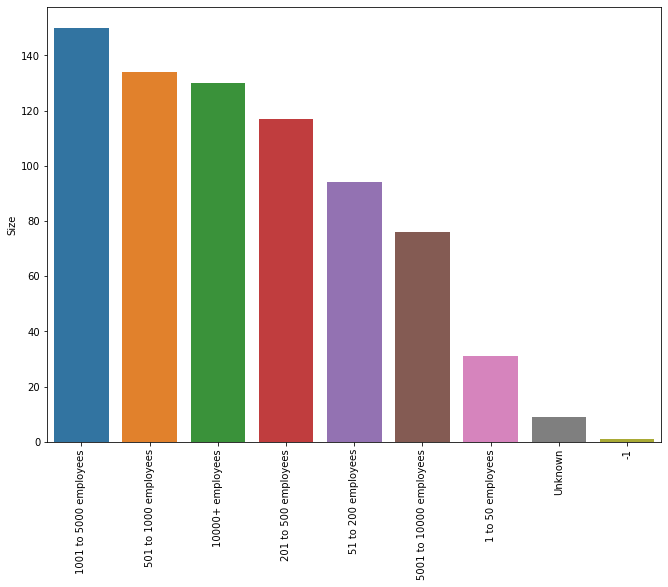

Graph for Type of ownership: total = 11


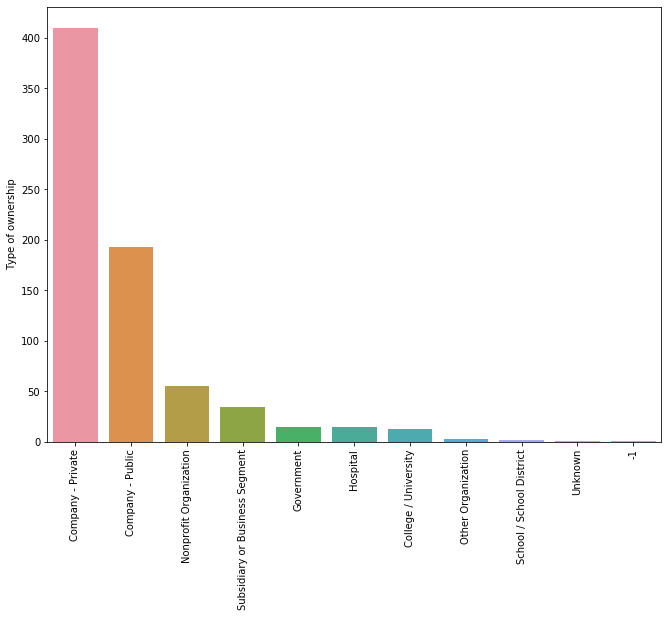

Graph for Sector: total = 25


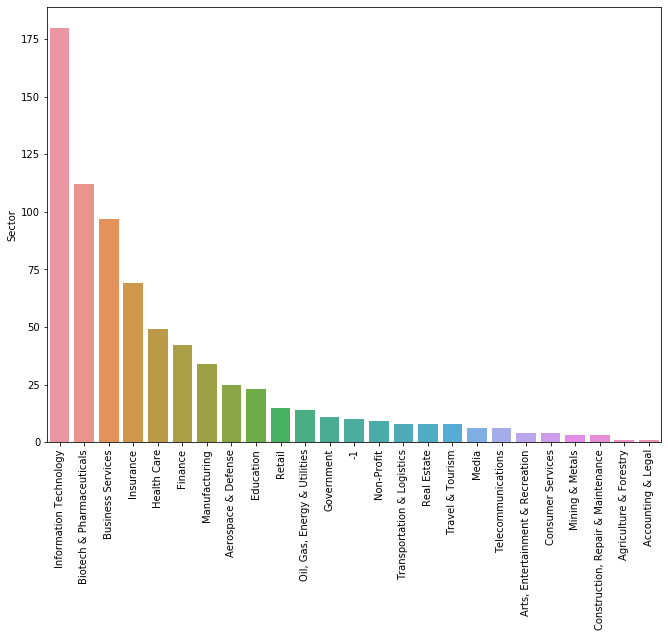

Graph for Revenue: total = 14


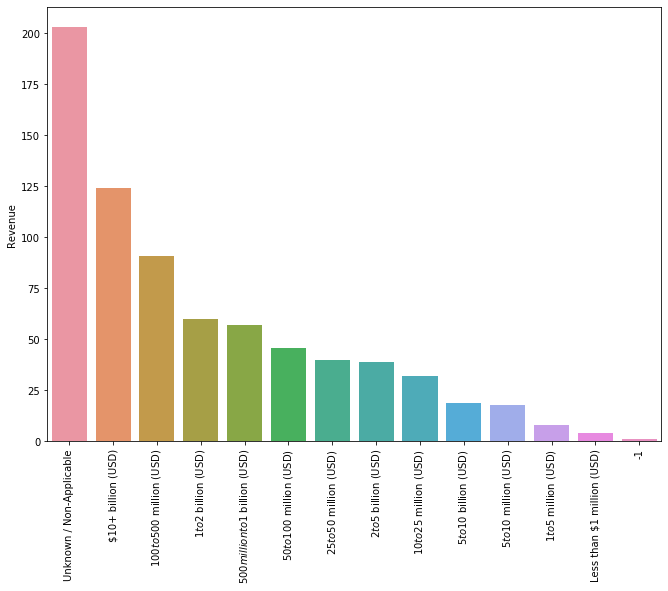

Graph for job_state: total = 37


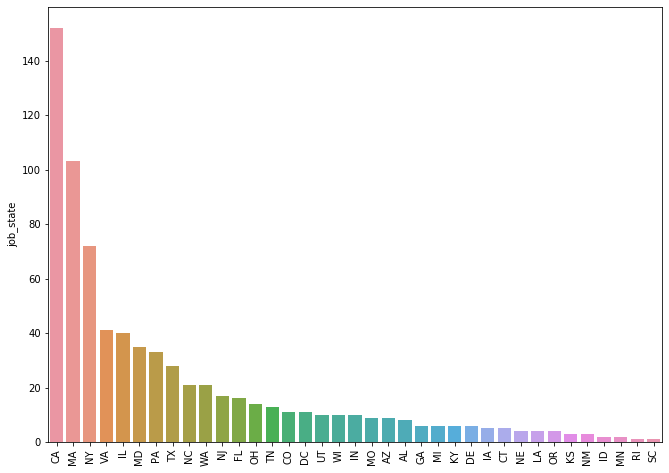

In [55]:
features = ['Size','Type of ownership','Sector','Revenue','job_state']
# plotting bar plots
for i in df_categorical[features].columns:
    cat_num = x = df_categorical[i].value_counts() # cat_num is the number of unique values for a given column and cat_num.index() is the name of that value
    print('Graph for %s: total = %d'%(i, len(cat_num)))
    fig, ax = plt.subplots(figsize=(11,8))
    chart = sns.barplot(x=cat_num.index, y=cat_num, ax =ax)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

Graph for Company Name: total = 20


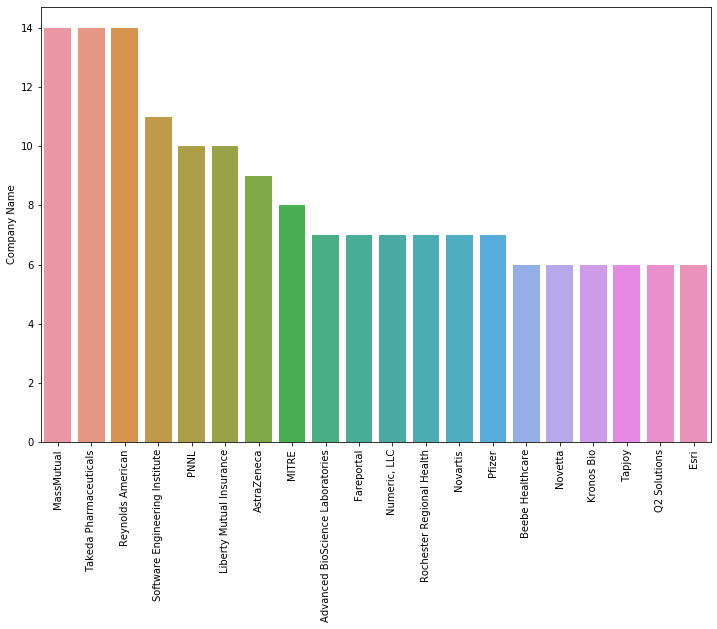

Graph for Headquarters: total = 20


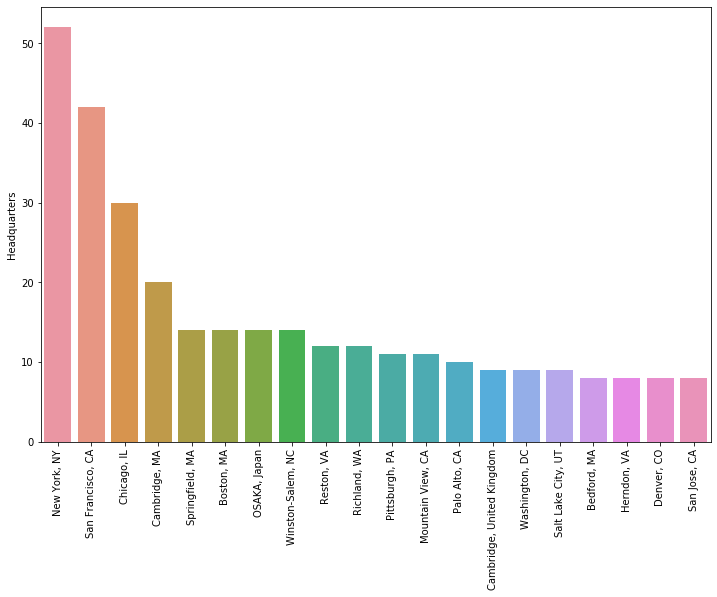

Graph for Founded: total = 20


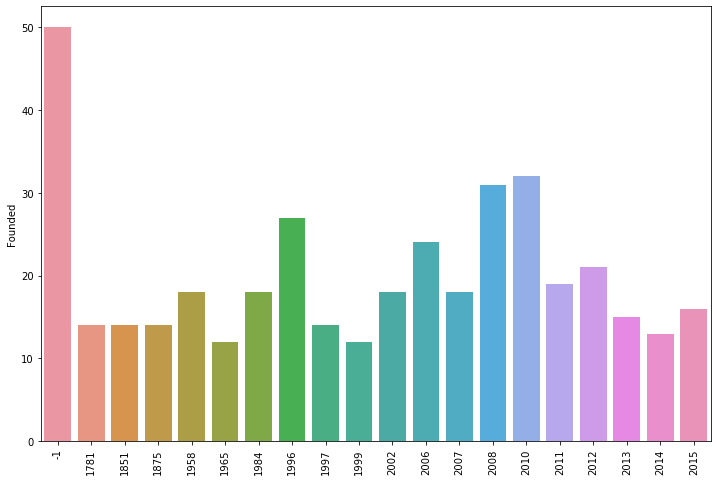

Graph for Industry: total = 20


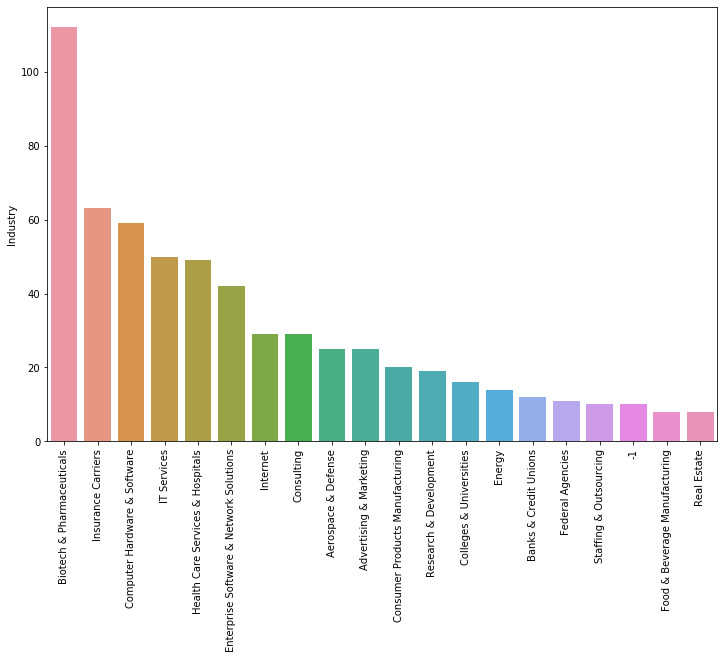

In [56]:
features = ['Company Name','Headquarters','Founded', 'Industry']
# plotting bar plots
for i in df_categorical[features].columns:
    cat_num = x = df_categorical[i].value_counts()[:20] # cat_num is the number of unique values for a given column (only top 20) and cat_num.index() is the name of that value
    print('Graph for %s: total = %d'%(i, len(cat_num)))
    fig, ax = plt.subplots(figsize=(12,8))
    chart = sns.barplot(x=cat_num.index, y=cat_num, ax =ax)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

In [57]:
# average salaries for different jobs
pd.pivot_table(df,index = 'job_simplified', values = 'avg_sal')

,avg_sal
job_simplified,
Analyst,66.122549
Data Engineer,105.403361
Data Scientist,117.564516
Director,168.607143
MLE,126.431818
Manager,84.022727


In [58]:
# for different job levels
pd.pivot_table(df,index = ['job_simplified','seniority'], values = 'avg_sal')

avg_sal
job_simplified seniority            
Analyst        Jr          53.250000
               Sr          80.092593
Data Engineer  Sr         124.689189
Data Scientist Jr         106.500000
               Sr         138.956522
MLE            Sr         142.071429

In [59]:
# average salary per state
pd.pivot_table(df,index = 'job_state', values = 'avg_sal').sort_values(by='avg_sal',ascending = False)

,avg_sal
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,107.412621
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [60]:
pd.set_option('display.max_rows',None)
# number of positions for different job roles in different states
pd.pivot_table(df,index = ['job_state','job_simplified'], values = 'avg_sal', aggfunc = 'count').sort_values(by = 'job_state', ascending = False)

avg_sal
job_state job_simplified         
WI        Data Scientist        3
          Analyst               3
WA        Data Scientist       17
          Analyst               3
VA        MLE                   2
          Data Scientist       18
          Data Engineer        10
          Analyst               6
UT        Data Engineer         3
          Analyst               4
          Data Scientist        3
TX        Data Scientist       13
          Data Engineer         8
TN        Data Scientist        1
          Data Engineer        10
          Analyst               2
RI        Analyst               1
PA        Data Scientist        6
          Data Engineer         1
          Analyst               8
          MLE                   7
          Manager               3
OR        Data Scientist        3
          Data Engineer         1
OH        Data Scientist        7
          Analyst               4
NY        MLE                   2
          Data Scientist       40
          Data Engineer         4
          Analyst              14
NM        Data Scientist        3
NJ        Data Scientist        4
          Analyst               6
          Data Engineer         2
          Manager               2
          Director              2
NC        Data Scientist        3
          Data Engineer         6
MO        Manager               1
          Data Scientist        3
          Analyst               2
MN        Data Engineer         1
          Analyst               1
MI        Manager               2
          Data Scientist        4
MD        Data Scientist       13
          Data Engineer         3
          Analyst               3
MA        Manager               5
          Director              6
          Data Scientist       30
          Data Engineer        12
          Analyst               4
LA        Analyst               1
          Data Engineer         2
KY        Data Scientist        2
KS        MLE                   3
IN        Data Scientist        2
          Data Engineer         4
IL        Analyst               3
          MLE                   2
          Director              6
          Data Scientist       15
          Data Engineer         8
ID        Analyst               2
IA        Analyst               2
          Data Engineer         3
GA        Data Scientist        3
FL        Data Scientist        7
          Data Engineer         3
          Analyst               6
DC        Data Scientist        5
          Data Engineer         4
          Analyst               2
CT        Data Scientist        2
CO        Data Scientist        3
          Data Engineer         3
          Analyst               1
          MLE                   1
CA        Manager               9
          MLE                   5
          Data Scientist       68
          Data Engineer        25
          Analyst              18
AZ        Data Scientist        1
          Analyst               1
          Data Engineer         5
AL        Data Engineer         1
          Analyst               5

In [61]:
# average salary of data scientists in different states
pd.pivot_table(df[df.job_simplified == "Data Scientist"],index = 'job_state', values = 'avg_sal').sort_values(by = 'avg_sal', ascending = False)

,avg_sal
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [62]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly_sal', 'emp_provided_sal', 'min_sal', 'max_sal', 'avg_sal',
       'job_state', 'same_state', 'company_age', 'python', 'r_lang', 'excel',
       'anaconda', 'rapid', 'sql', 'tensorflow', 'tableau', 'spark', 'aws',
       'job_simplified', 'seniority', 'job_description_len',
       'num_of_competetors'],
      dtype='object')

In [63]:
features = ['Rating',
       'Company Name','Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly_sal', 'emp_provided_sal',
       'same_state', 'company_age', 'python', 'r_lang', 'excel',
       'anaconda', 'rapid', 'sql', 'tensorflow', 'tableau', 'spark', 'aws',
       'num_of_competetors']
df[features].head()

,Rating,Company Name,Founded,Type of ownership,Industry,Sector,Revenue,hourly_sal,emp_provided_sal,same_state,...,r_lang,excel,anaconda,rapid,sql,tensorflow,tableau,spark,aws,num_of_competetors
0,3.8,Tecolote Research,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,3.4,University of Maryland Medical System,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,4.8,KnowBe4,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,1,...,1,1,0,0,1,0,0,1,0,0
3,3.8,PNNL,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),0,0,1,...,0,0,0,0,0,0,0,0,0,3
4,2.9,Affinity Solutions,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,0,1,...,0,1,0,0,1,0,0,0,0,3


In [64]:
# creating pivot tables for different columns with average salary
for i in features:
    print(i,'\n')
    print(pd.pivot_table(df,index = i, values = 'avg_sal').sort_values(by = 'avg_sal', ascending = False))
    print('\n')

Rating 

           avg_sal
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 4.0    107.170213
 3.2    106.928571
 3.7    105.680328
 3.5    104.897959
 4.7    103.983871
 3.3    103.897436
 4.3    102.468750
 4.2    100.442308
 2.2     97.750000
 3.8     97.418033
 4.6     97.250000
 2.1     95.900000
 3.4     93.465909
 3.6     89.945652
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 2.7     85.178571
 2.8     83.928571
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286


Company Name 

                                                       avg_sal
Company Name                                                  
Gallup                                              237.500000
Sage Intacct                                        232.500000
CA-One Tech Cloud                                   225.000000
Grand Rounds                    

In [65]:
# python requirement for companies with different revenues
pd.pivot_table(df,index = 'Revenue', columns = 'python', values = 'avg_sal', aggfunc = 'count')

python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [66]:
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [67]:
words = " ".join(df['Job Description'])

def puntuation_stop(text):
    '''
    remove puntuation and stop words
    '''
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for word in word_tokens:
        if word not in stop_words and word.isalpha():
            filtered.append(word.lower())
    return filtered

word_filtered = puntuation_stop(words)
text = " ".join([word for word in word_filtered])


In [68]:
word_filtered = puntuation_stop(words)
text = " ".join([word for word in word_filtered])

stopwords = set(STOPWORDS)

jobd_cloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords,
    random_state = 1,
    width = 800,
    height = 1500
)
jobd_cloud.generate(text)

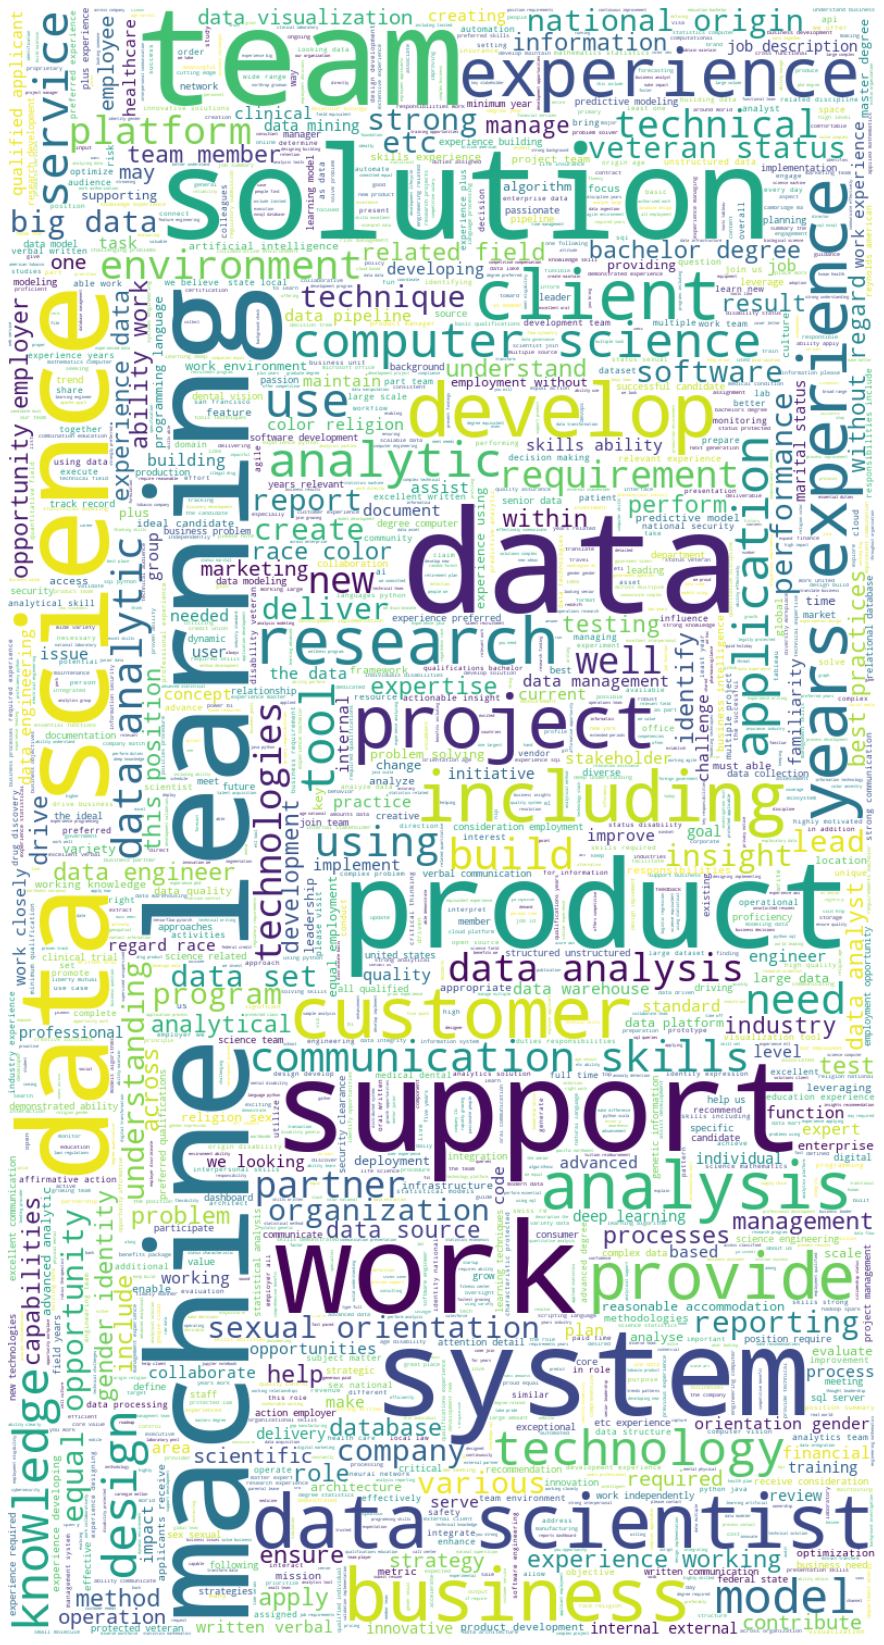

In [69]:
fig = plt.figure()
fig.set_figwidth(16) # set width
fig.set_figheight(30) # set height
# display the word cloud
plt.imshow(jobd_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()